### Training and Visualizing a Decision Tree

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [28]:
iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)','petal width (cm)']].values 
y_iris = iris.target

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_iris,y_iris)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [29]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

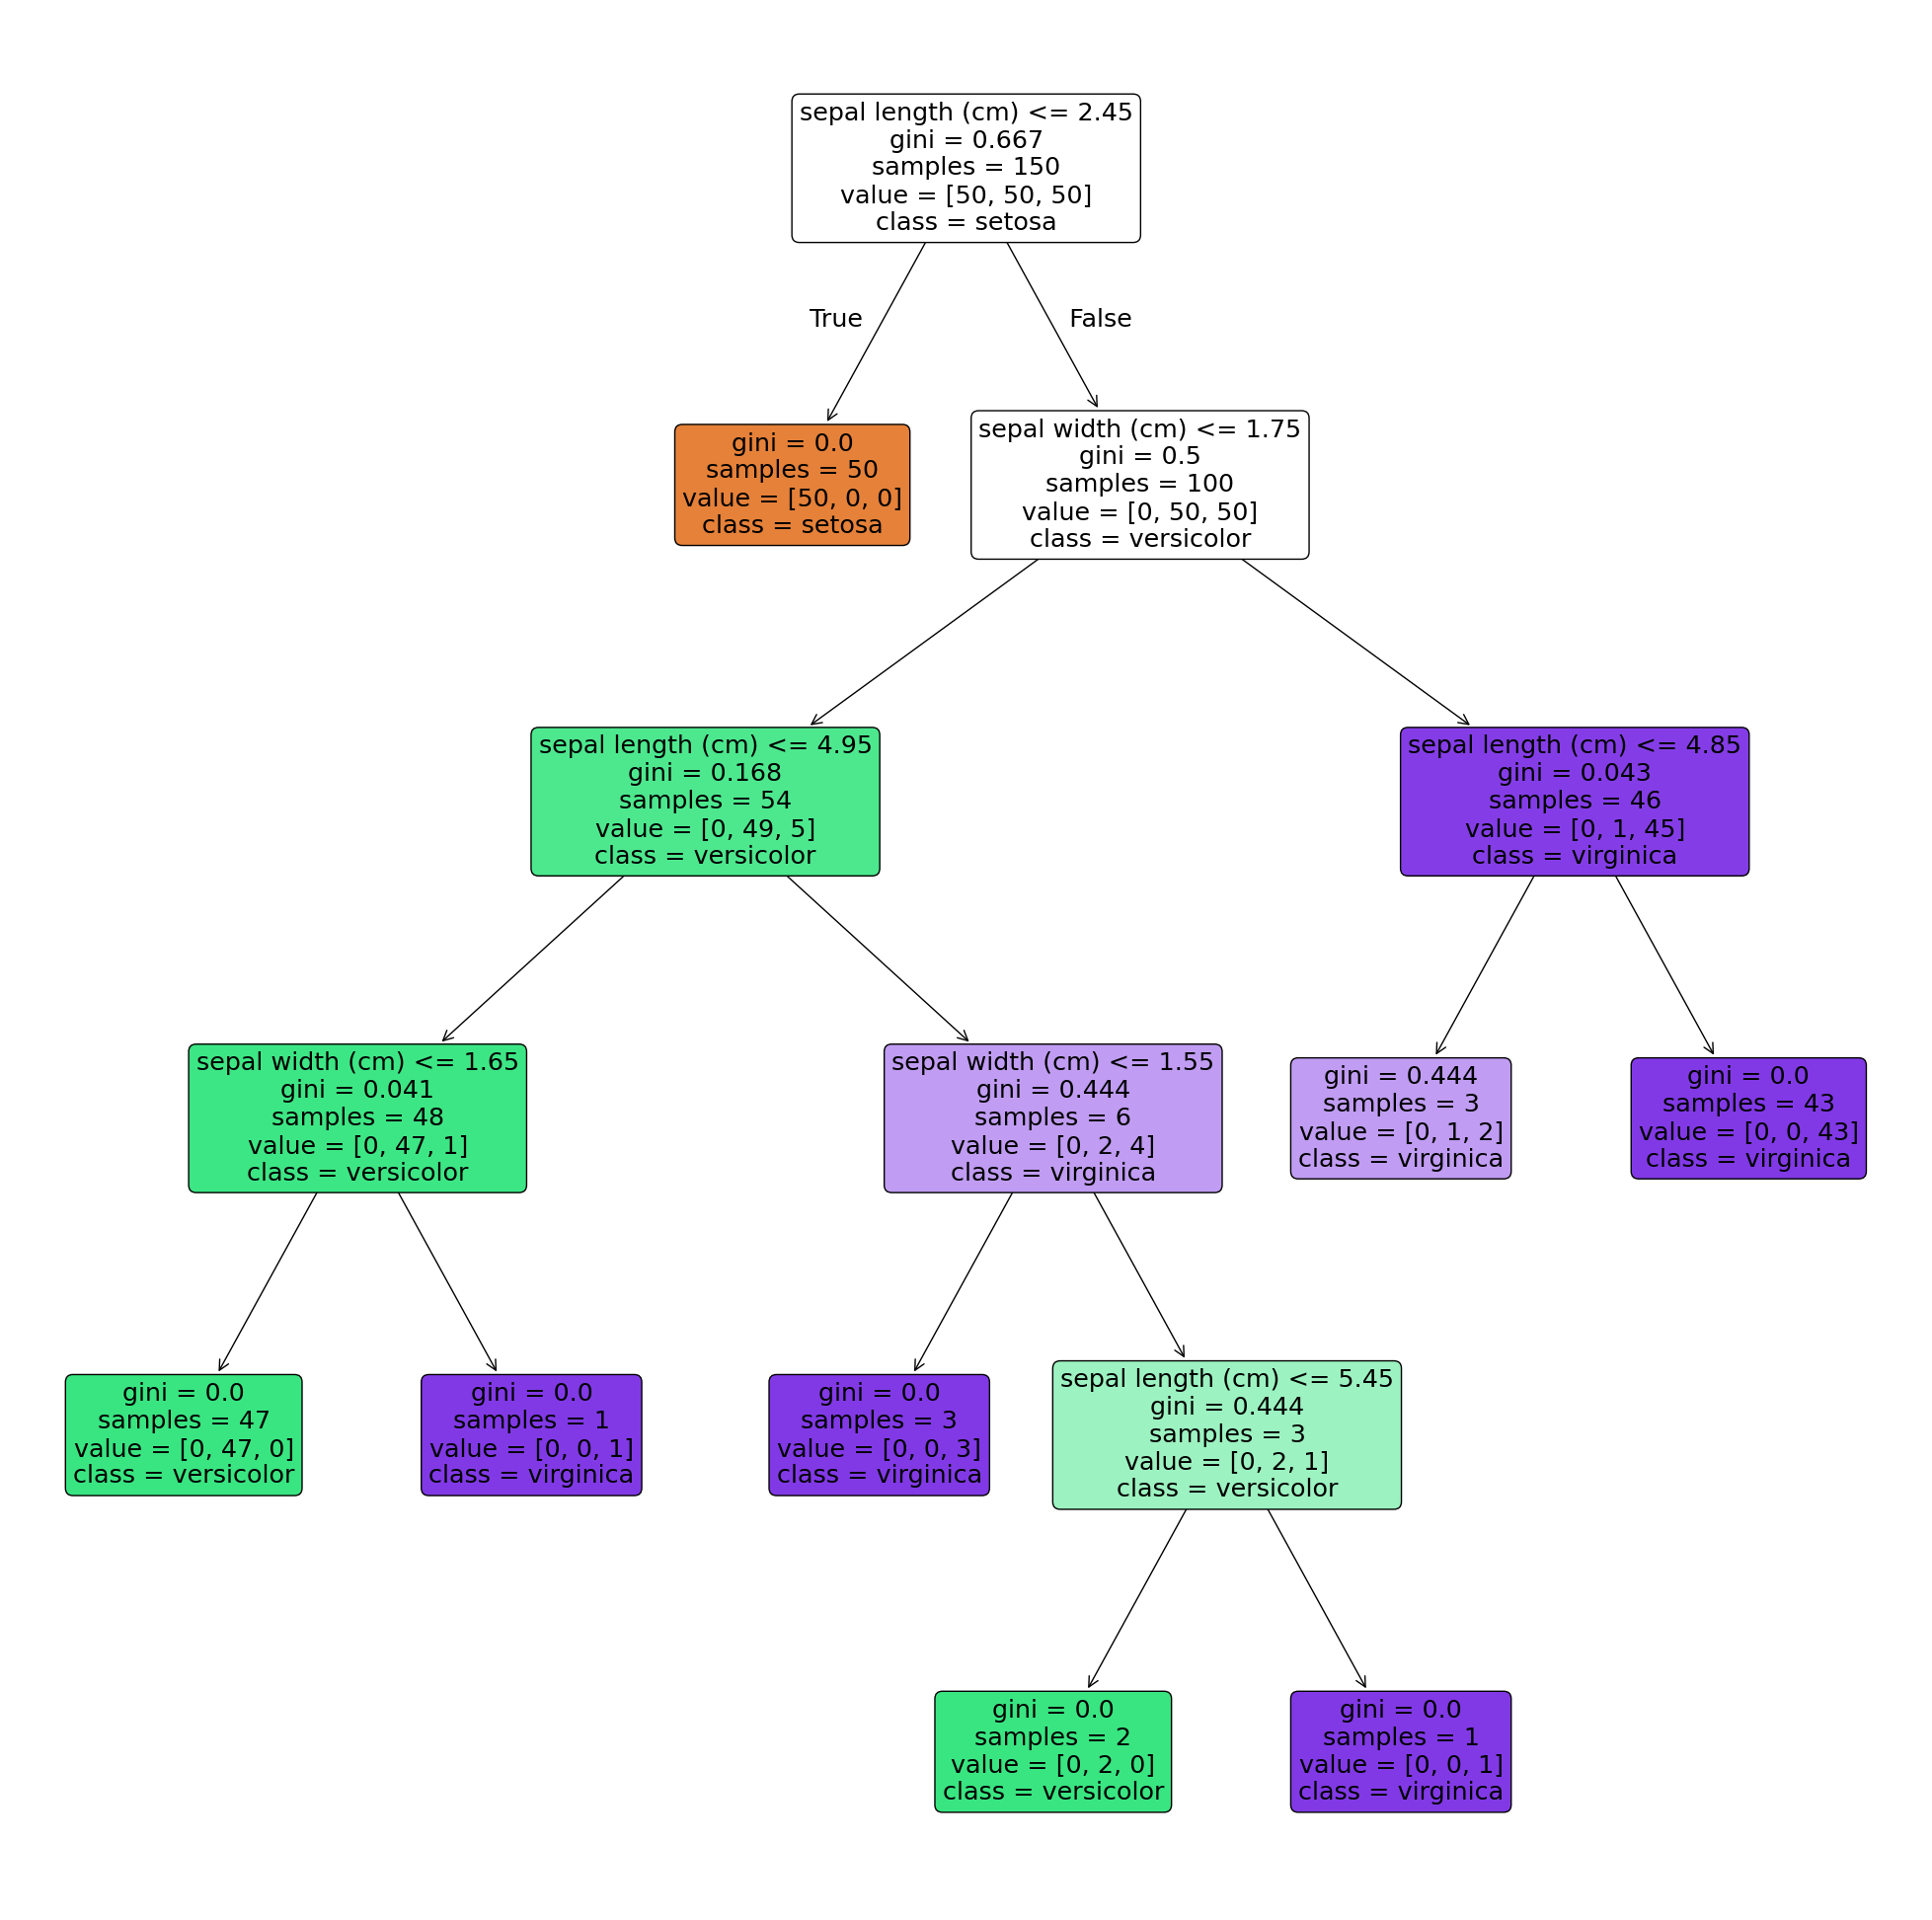

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,25))
plot_tree(tree_clf,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True)
plt.show()

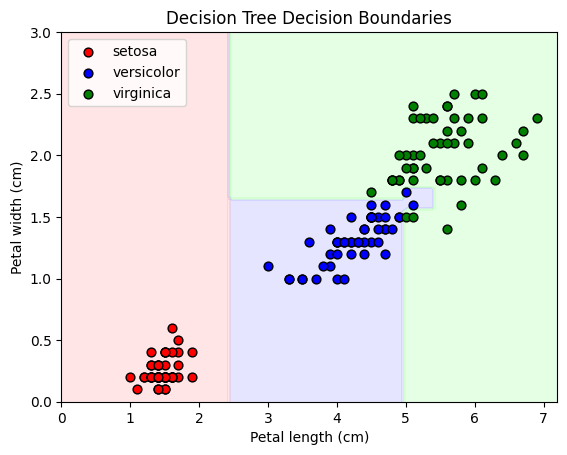

In [31]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_bold  = ["red", "blue", "green"]

petal_length_range = np.linspace(0,7.2,100)
petal_width_range = np.linspace(0,3,100)
x0,x1 = np.meshgrid(petal_length_range,petal_width_range)
X_new = np.c_[x0.ravel(),x1.ravel()]

y_pred = tree_clf.predict(X_new).reshape(x0.shape)

plt.contourf(x0,x1,y_pred,alpha=0.3,cmap=cmap_light)
for idx, name in enumerate(iris.target_names):
    plt.scatter(
        X_iris[y_iris == idx, 0],
        X_iris[y_iris == idx, 1],
        c=cmap_bold[idx],
        label=name,
        edgecolor="k",
        s=40
    )

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.legend()
plt.title("Decision Tree Decision Boundaries")
plt.show()


2.449999988079071 1.75 4.950000047683716 4.8500001430511475


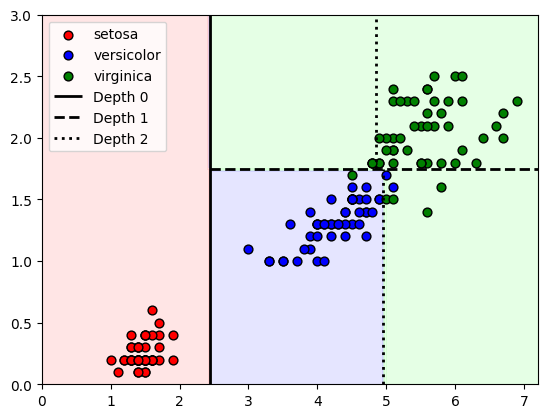

In [32]:
# deeper tree visualization better plot
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF", "#AAFFAA"])
cmap_bold  = ["red", "blue", "green"]

petal_length_range = np.linspace(0,7.2,100)
petal_width_range = np.linspace(0,3,100)
x0,x1 = np.meshgrid(petal_length_range,petal_width_range)
X_new = np.c_[x0.ravel(),x1.ravel()]


tree_clf_deeper = DecisionTreeClassifier(max_depth=3,random_state=42)
tree_clf_deeper.fit(X_iris,y_iris)

y_pred = tree_clf_deeper.predict(X_new).reshape(x0.shape)

plt.contourf(x0,x1,y_pred,alpha=0.3,cmap=cmap_light)
for idx, name in enumerate(iris.target_names):
    plt.scatter(
        X_iris[y_iris == idx, 0],
        X_iris[y_iris == idx, 1],
        c=cmap_bold[idx],
        label=name,
        edgecolor="k",
        s=40
    )
# extract the thresholds by passing the array of indexs for which we want to retrieve
# note below are the node indexes that we are passing in threshold
th0,th1,th2a,th2b = tree_clf_deeper.tree_.threshold[[0,2,3,6]]  
print(th0,th1,th2a,th2b)

plt.vlines(th0, ymin=0, ymax=3, colors="k", linewidth=2,label="Depth 0")
plt.hlines(th1, xmin=th0, xmax=7.2, colors="k", linestyles="--", linewidth=2,label="Depth 1")
plt.vlines([th2a, th2b],
           ymin=[0, th1],
           ymax=[th1, 3],
           colors="k",
           linestyles=":",
           linewidth=2,
           label="Depth 2")
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()


### Estimating the class prob

In [33]:
tree_clf.predict_proba([[5,1.5]]).round(3)

array([[0., 0., 1.]])

In [34]:
tree_clf.predict([[5,1.5]])

array([2])

### Regularizing Hyperparameters

In [35]:
from sklearn.datasets import make_moons

X_moons,y_moons = make_moons(n_samples=150,noise=0.2,random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)
tree_clf1.fit(X_moons,y_moons)
tree_clf2.fit(X_moons,y_moons)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

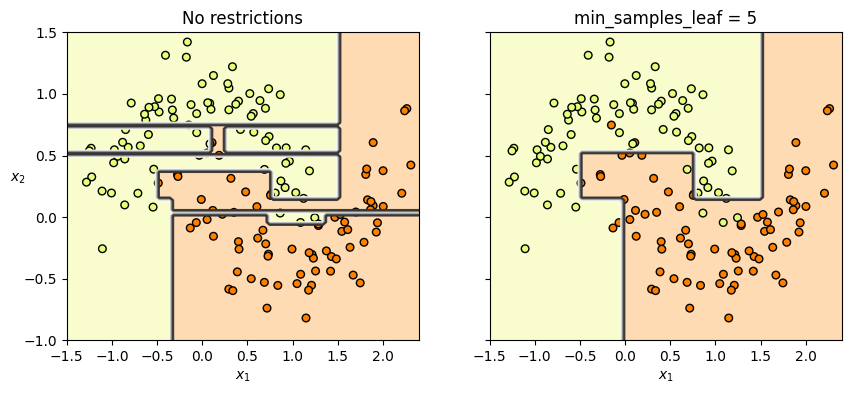

In [36]:
def plot_decision_boundary(clf,X,y,axes,cmap):
    x1,x2 = np.meshgrid(np.linspace(axes[0],axes[1],100),
                        np.linspace(axes[2],axes[3],100))
    
    X_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=cmap)
    plt.contour(x1,x2,y_pred,cmap="Greys",alpha=0.8)

    plt.scatter(X[:,0],X[:,1],
                c=y,
                cmap=cmap,
                edgecolors='k',
                s=30)
    
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$",rotation=0)


fig,axes = plt.subplots(ncols=2,nrows=1,figsize=(10,4),sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1,X_moons,y_moons,
                       axes=[-1.5,2.4,-1,1.5],
                       cmap='Wistia')

plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2,X_moons,y_moons,
                       axes=[-1.5,2.4,-1,1.5],
                       cmap='Wistia')

plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")

plt.show()


In [37]:
X_moons_test,y_moons_test = make_moons(n_samples=1000,noise=0.2,random_state=42)
tree_clf1.score(X_moons_test,y_moons_test)

0.901

In [38]:
tree_clf2.score(X_moons_test, y_moons_test)


0.918

### Regression

In [39]:
import numpy as np 
from sklearn.tree import DecisionTreeRegressor

rng = np.random.default_rng(seed=42)
X_quad = rng.random((200,1)) - 0.5
y_quad = X_quad ** 2 + 0.025 * rng.standard_normal((200,1))
tree_reg = DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg.fit(X_quad,y_quad)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

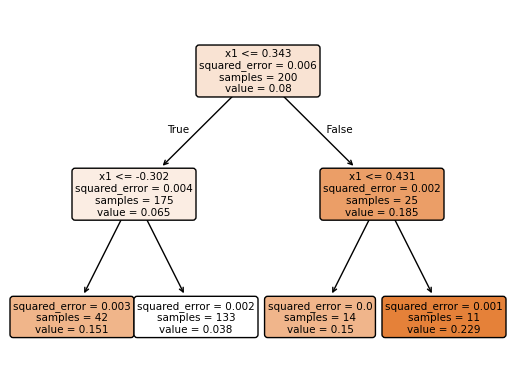

In [40]:
plot_tree(tree_reg,feature_names=['x1'],rounded=True,filled=True)
plt.show()

In [41]:
tree_reg = DecisionTreeRegressor(random_state=42,max_depth=3)
tree_reg.fit(X_quad,y_quad)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

In [42]:
tree_reg.tree_.threshold

array([ 0.34304063, -0.30182856, -0.41395289, -2.        , -2.        ,
        0.21817657, -2.        , -2.        ,  0.43140428,  0.39480372,
       -2.        , -2.        ,  0.46470371, -2.        , -2.        ])

In [43]:
tree_reg2 = DecisionTreeRegressor(max_depth=3,random_state=42)
tree_reg2.fit(X_quad,y_quad)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf

0.3430406302213669 -0.3018285632133484 -2.0


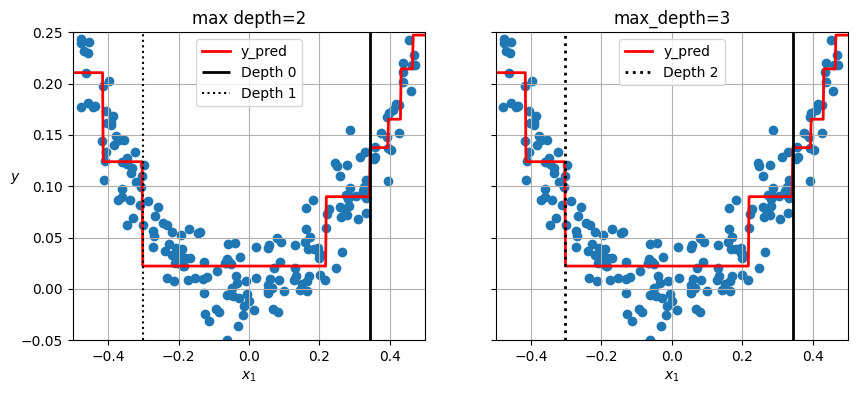

In [44]:
def plot_regression_boundary(tree_reg,X,y,axes):
    x1 = np.linspace(axes[0],axes[1],500).reshape(-1,1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)

    plt.xlabel("$x_1$")
    plt.scatter(X,y)
    plt.plot(x1,y_pred,linewidth=2,label="y_pred",color='red')

fig,axes = plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plot_regression_boundary(tree_reg,X_quad,y_quad,axes=[-0.5,0.5,-0.05,0.25])

th0,th1a,th1b = tree_reg.tree_.threshold[[0,1,4]]

print(th0,th1a,th1b)
plt.vlines(th0,-0.05,0.25,linewidth=2,colors='black',label="Depth 0")
plt.vlines([th1a,th1b],-0.05,0.25,linestyles='dotted',colors='black',label="Depth 1")
plt.ylabel("$y$",rotation=0)

plt.legend(loc="upper center")
plt.title("max depth=2")
plt.grid()

plt.sca(axes[1])
plot_regression_boundary(tree_reg2,
                         X_quad,
                         y_quad,
                         axes=[-0.5,0.5,-0.05,0.25])
plt.vlines(th0,-0.05,0.25,linewidth=2,colors='black')

plt.vlines([th1a,th1b],
           ymin=-0.05,
           ymax=0.25,
           linestyles='dotted',
           linewidth=2,
           colors='black',
           label="Depth 2")

plt.legend(loc='upper center')
plt.title("max_depth=3")

plt.grid()
plt.show()

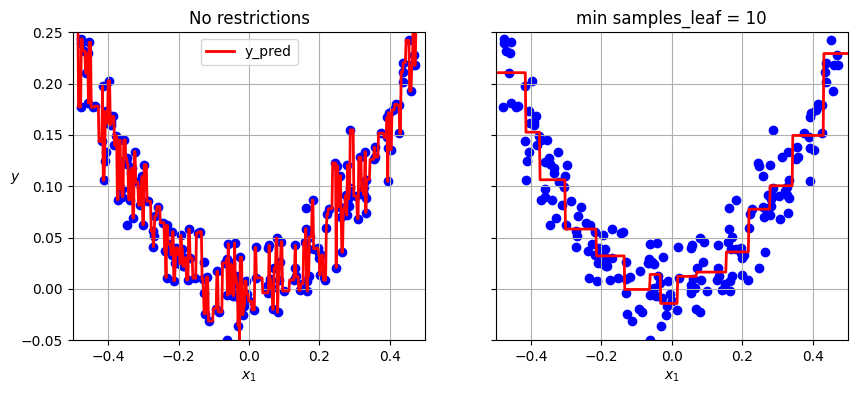

In [45]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42,min_samples_leaf=10)
tree_reg1.fit(X_quad,y_quad)
tree_reg2.fit(X_quad,y_quad)

x1 = np.linspace(-0.5,0.5,500).reshape(-1,1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig,axes = plt.subplots(ncols=2,figsize=(10,4),sharey=True)

plt.sca(axes[0])
plt.scatter(X_quad,y_quad,c='blue')
plt.plot(x1,y_pred1,linewidth=2,color='red',label="y_pred")
plt.axis([-0.5,0.5,-0.05,0.25])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$y$",rotation=0)
plt.legend(loc="upper center")
plt.title("No restrictions")
plt.grid()

plt.sca(axes[1])
plt.scatter(X_quad,y_quad,c='blue')
plt.plot(x1,y_pred2,c='red',linewidth=2)
plt.axis([-0.5,0.5,-0.05,0.25])
plt.xlabel(r"$x_1$")
plt.title(f"min samples_leaf = {tree_reg2.min_samples_leaf}")
plt.grid()
plt.show()

In [46]:
from sklearn.decomposition import PCA 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(),
                             PCA(random_state=42))

X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2,random_state=42)
tree_clf_pca.fit(X_iris_rotated,y_iris)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",2
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

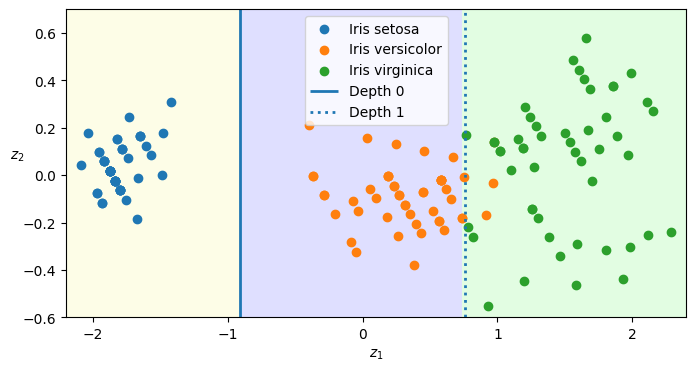

In [47]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.figure(figsize=(8,4))

axes = [-2.2,2.4,-0.6,0.7]
z0s,z1s = np.meshgrid(np.linspace(axes[0],axes[1],100),
                      np.linspace(axes[2],axes[3],100))

X_iris_pca_all = np.c_[z0s.ravel(),z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s,z1s,y_pred,alpha=0.3,cmap=custom_cmap)


for idx,name in enumerate(iris.target_names):
    plt.scatter(X_iris_rotated[y_iris == idx,0],
                X_iris_rotated[y_iris == idx,1],
                label=f"Iris {name}")
    
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$",rotation=0)

th1,th2 = tree_clf_pca.tree_.threshold[[0,2]]
plt.vlines(th1,axes[2],axes[3],linewidth=2,label="Depth 0")
plt.vlines(th2,axes[2],axes[3],linestyles='dotted',linewidth=2,label="Depth 1")
plt.axis(axes)
plt.legend()
plt.show()


_Exercise: train and fine-tune a Decision Tree for the moons dataset._
1. Generate a moons dataset with `make_moons(n_samples=1000,noise=0.4)`
2. Split into train set and test set `train_test_split()`. 

In [48]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X_moons,y_moons = make_moons(n_samples=10000,noise=0.4,random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X_moons,
                                                 y_moons,
                                                 test_size=0.2,
                                                 random_state=42)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    "max_leaf_nodes":list(range(2,100)),
    "max_depth":[1,2,3,4,5,6],
    "min_samples_split":[2,3,4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1)
grid_search.fit(X_train,y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [1, 2, ...], 'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : t

In [50]:
grid_search.best_params_

{'max_depth': 6, 'max_leaf_nodes': 17, 'min_samples_split': 2}

In [52]:
from sklearn.metrics import accuracy_score

y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test,y_pred)
print("Accuracy score:",acc)

Accuracy score: 0.8595


_Exercise: Grow a forest_
1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn's ShuffleSplit class for this.

In [54]:
from sklearn.model_selection import ShuffleSplit

n_trees = 1000 
n_instances = 1000 
mini_sets = []


splitter = ShuffleSplit(n_splits=5,test_size=len(X_train) - n_instances,random_state=42)

for mini_train_index,mini_test_index in splitter.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append([X_mini_train,y_mini_train])


In [55]:
from sklearn.base import clone 

forest = [clone(grid_search.best_estimator_) for _ in range(n_trees)]
accuracy_scores = []

for tree,(X_mini_train,y_mini_train) in zip(forest,mini_sets):
    tree.fit(X_mini_train,y_mini_train)

    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))

np.mean(accuracy_scores)

np.float64(0.8540000000000001)